# Basic visualization of the surface-to-sky radiance ratio, Rss

In [1]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

from surface_sky_radiance_ratio import lut

## Load the tabulated data, by default a reduced size look-up table is used, if you already downloaded the full simulation file you can use `ssrr = lut(lutfile='full')`

In [2]:
ssrr = lut()
ssrr.load()

## check the loaded data

In [3]:
ssrr.Rss_lut

<xarray.Dataset>
Dimensions:         (wl: 7, aot_ref: 9, sza: 45, wind: 6, azi: 24, model: 4,
                     vza: 3)
Coordinates:
  * wl              (wl) float32 350.0 400.0 500.0 600.0 700.0 800.0 1e+03
  * aot_ref         (aot_ref) float32 0.0 0.01 0.1 0.2 0.35 0.5 0.7 1.0 1.5
  * sza             (sza) float32 0.0 2.0 4.0 6.0 8.0 ... 82.0 84.0 86.0 88.0
  * wind            (wind) float64 0.5 2.0 4.0 8.0 12.0 16.0
  * azi             (azi) float32 45.0 50.0 55.0 60.0 ... 150.0 155.0 160.0
  * model           (model) object 'COAV_rh70' 'DESE_rh70' ... 'URBA_rh70'
    slope_variance  (wind) float64 ...
  * vza             (vza) int64 30 40 50
Data variables:
    Rss             (wind, model, aot_ref, wl, sza, vza, azi) float64 ...

## You can easily get the spectral values for a given configuration

[0.02514379 0.02440997 0.02358825 0.02311463 0.02279958 0.02257289
 0.02220238]


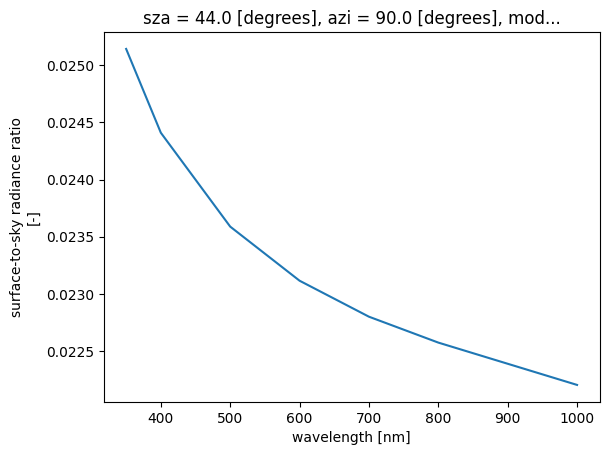

In [4]:
vza=40
azi=90
sza=44
model='MACL_rh70'
aot_ref=0
wind=2
Rss = ssrr.Rss_lut.Rss.sel(model=model).sel(vza=40,azi=90,sza=44,method='nearest').interp(wind=wind).interp(aot_ref=aot_ref)
print(Rss.values)
Rss.plot()


### You can also interpolate over the wavelengths

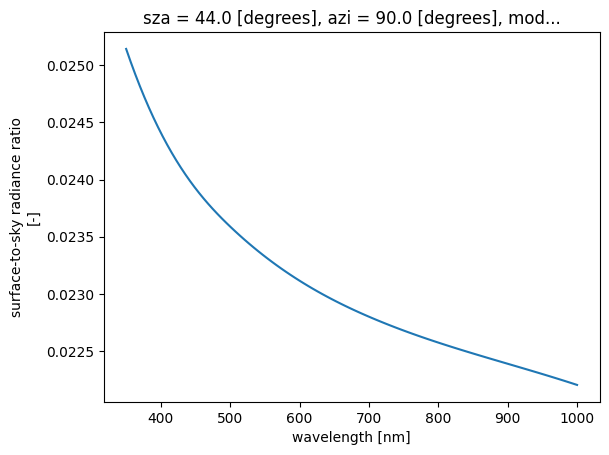

In [5]:
wl=np.linspace(350,1000,100)
Rss.interp(wl=wl,method='cubic').plot()

### if you want to change the font settings
plt.rcParams.update({'font.size': 16})

rc = {"font.family": "serif", "mathtext.fontset": "stix", 'font.size': 16, 'axes.labelsize': 18}

plt.rcParams.update(rc)

plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]

### You can plot Rss values versus the solar zenith angle, as follows

Text(0.5, 0.98, 'wl=500.0, aot=0.000, model=MACL_rh70')

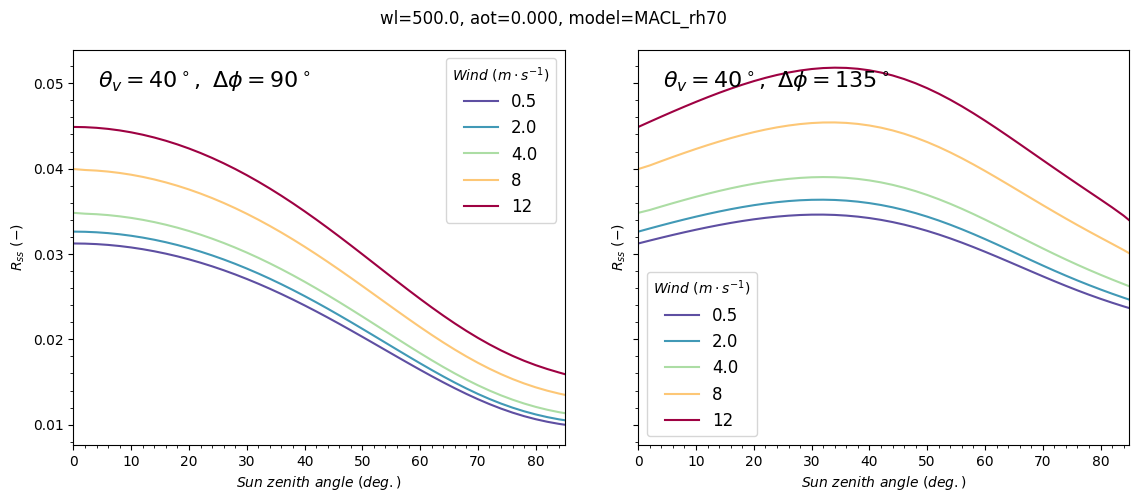

In [6]:
vza=40
azi=90
wl=500
model='MACL_rh70'
aot_ref=0

fig,axs = plt.subplots(1,2,figsize=(12,5),sharex=True,sharey='row')
fig.subplots_adjust(left=0.1, right=0.98, top=0.9,hspace=.1, wspace=0.15)
ssrr.plot_vs_sza(ax=axs[0],vza=vza,azi=azi,wl=wl,model=model,aot_ref=aot_ref)
azi=135
ssrr.plot_vs_sza(ax=axs[1],vza=vza,azi=azi,wl=wl,model=model,aot_ref=aot_ref)
plt.suptitle('wl={:.1f}, aot={:.3f}, model='.format(wl,aot_ref)+model)

Text(0.5, 0.98, 'wl=850.0, aot=0.000, model=MACL_rh70')

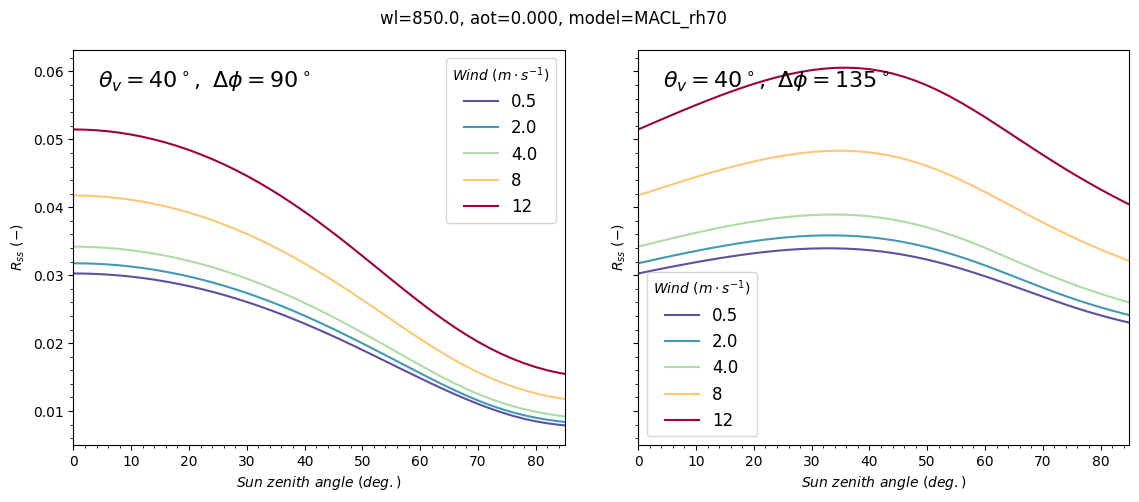

In [7]:

wl=850
azi=90
fig,axs = plt.subplots(1,2,figsize=(12,5),sharex=True,sharey='row')
fig.subplots_adjust(left=0.1, right=0.98, top=0.9,hspace=.1, wspace=0.15)
ssrr.plot_vs_sza(ax=axs[0],vza=vza,azi=azi,wl=wl,model=model,aot_ref=aot_ref)
azi=135
ssrr.plot_vs_sza(ax=axs[1],vza=vza,azi=azi,wl=wl,model=model,aot_ref=aot_ref)
plt.suptitle('wl={:.1f}, aot={:.3f}, model='.format(wl,aot_ref)+model)

Text(0.5, 0.98, 'wl=850.0, aot=0.200, model=MACL_rh70')

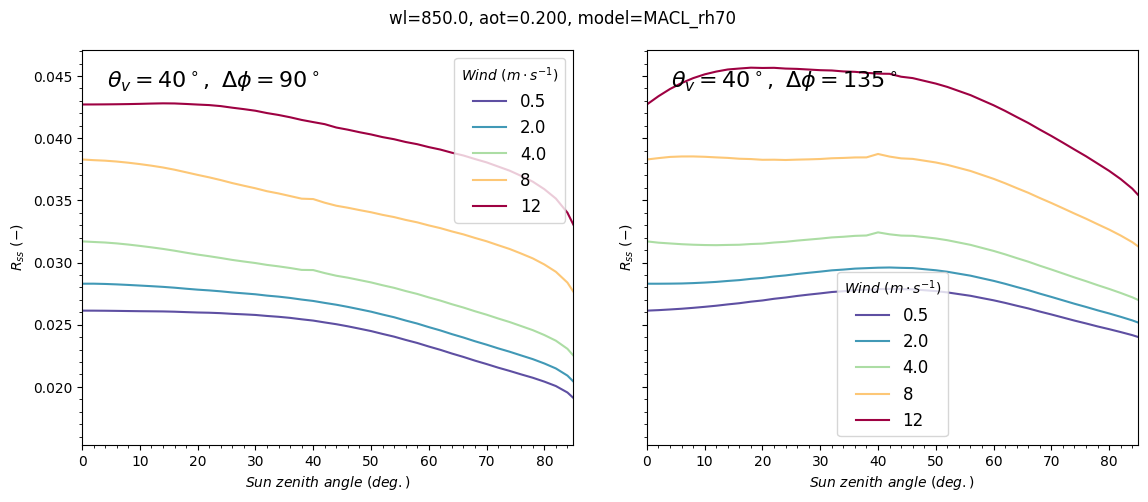

In [8]:
vza=40
azi=90
wl=850
model='MACL_rh70'
aot_ref=0.2
fig,axs = plt.subplots(1,2,figsize=(12,5),sharex=True,sharey='row')
fig.subplots_adjust(left=0.1, right=0.98, top=0.9,hspace=.1, wspace=0.15)
ssrr.plot_vs_sza(ax=axs[0],vza=vza,azi=azi,wl=wl,model=model,aot_ref=aot_ref)
azi=135
ssrr.plot_vs_sza(ax=axs[1],vza=vza,azi=azi,wl=wl,model=model,aot_ref=aot_ref)
plt.suptitle('wl={:.1f}, aot={:.3f}, model='.format(wl,aot_ref)+model)

Text(0.5, 0.98, 'wl=350.0, aot=0.200, model=MACL_rh70')

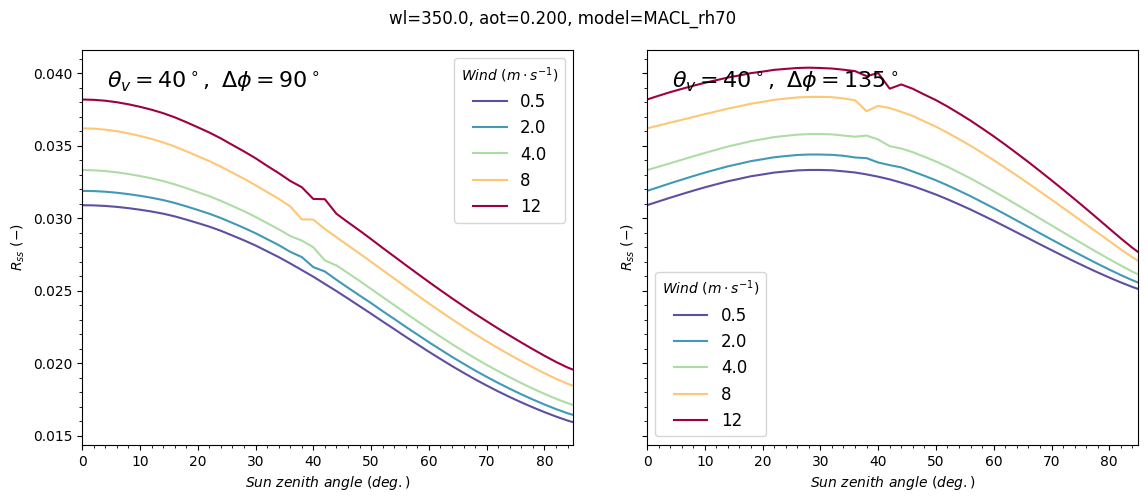

In [9]:
wl=350

fig,axs = plt.subplots(1,2,figsize=(12,5),sharex=True,sharey='row')
fig.subplots_adjust(left=0.1, right=0.98, top=0.9,hspace=.1, wspace=0.15)
azi=90
ssrr.plot_vs_sza(ax=axs[0],vza=vza,azi=azi,wl=wl,model=model,aot_ref=aot_ref)
azi=135
ssrr.plot_vs_sza(ax=axs[1],vza=vza,azi=azi,wl=wl,model=model,aot_ref=aot_ref)
plt.suptitle('wl={:.1f}, aot={:.3f}, model='.format(wl,aot_ref)+model)
